In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score

In [2]:
data=pd.read_csv("clean_pcos_data.csv")

In [3]:
data

,Target,Cycle(R/I),AMH(ng/mL),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Pimples(Y/N),Fast food (Y/N),Follicle No. (L),Follicle No. (R)
0,0,0,2.07,0,0,0,0,1.0,3,3
1,0,0,1.53,0,0,0,0,0.0,3,5
2,1,0,6.63,0,0,0,1,1.0,13,15
3,0,0,1.22,0,0,0,0,0.0,2,2
4,0,0,2.26,0,0,0,0,0.0,3,4
...,...,...,...,...,...,...,...,...,...,...
536,0,0,1.70,0,0,0,0,0.0,1,0
537,0,0,5.60,1,0,0,0,0.0,9,7
538,0,0,3.70,0,0,0,0,0.0,1,0
539,0,1,5.20,0,0,0,1,0.0,7,6


In [4]:
data.isnull().sum()

Target                  0
Cycle(R/I)              0
AMH(ng/mL)              0
Weight gain(Y/N)        0
hair growth(Y/N)        0
Skin darkening (Y/N)    0
Pimples(Y/N)            0
Fast food (Y/N)         0
Follicle No. (L)        0
Follicle No. (R)        0
dtype: int64

<Axes: >

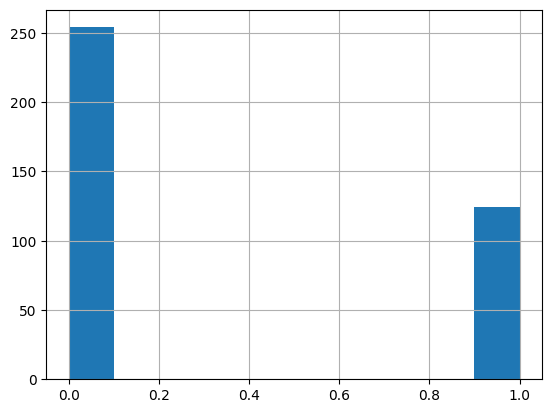

In [5]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=["Target"])
y = data["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

y_train.hist()

In [6]:
print("X_train",len(X_train))
print("X_test",len(X_test))
print("y_train",len(y_train))
print("y_test",len(y_test))

X_train 378
X_test 163
y_train 378
y_test 163


In [7]:
rf_model1 = RandomForestClassifier(random_state=42)
rf_model1.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [8]:
print (f'Train Accuracy - : {rf_model1.score(X_train, y_train): .3f}')
print (f'Test Accuracy - : {rf_model1.score(X_test, y_test): .3f}')

Train Accuracy - :  1.000
Test Accuracy - :  0.877


In [9]:
rf_predict = rf_model1.predict(X_test)
cm = confusion_matrix(y_test, rf_predict)
print(classification_report(y_test, rf_predict))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       110
           1       0.82      0.79      0.81        53

    accuracy                           0.88       163
   macro avg       0.86      0.86      0.86       163
weighted avg       0.88      0.88      0.88       163



In [11]:
# # number of trees in random forest
# n_estimators = [300, 500]
# # Number of feature to consider at every split
# max_features = ['sqrt', 'log2', None]
# #  maximun number levels in tree
# max_depth = [1, 3, None]
# # minimum number of samples required to split a node
# min_samples_split = [3, 10]
# # minimum number of samples required at each leaf node
# min_samples_leaf = [1, 3, 10]
# # method of selecting samples for training each tree
# bootstrap =[True, False]
# criterion = ['gini', 'entropy']

In [12]:
# #  create the param drid
# param_grid = {
#     "n_estimators" : n_estimators,
#     "max_features" : max_features,
#     "max_depth" : max_depth,
#     "criterion" : criterion,
#     "min_samples_split" : min_samples_split,
#     "min_samples_leaf" : min_samples_leaf,
#     "bootstrap" : bootstrap
# }
# print(param_grid)

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
import numpy as np

# Definisikan ruang pencarian parameter
param_distributions = {
    'n_estimators': [100, 200, 300, 500],         # Jumlah pohon
    'max_depth': [None, 10, 20, 30, 50],          # Kedalaman pohon
    'min_samples_split': [2, 5, 10, 15],          # Minimum sampel untuk split
    'min_samples_leaf': [1, 2, 4, 6],             # Minimum sampel di daun
    'bootstrap': [True, False]                    # Penggunaan bootstrap
}

# Inisialisasi model Random Forest
rf = RandomForestClassifier(random_state=42)

# Inisialisasi RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_distributions,
    n_iter=50,                # Jumlah kombinasi acak yang akan dicoba
    scoring='f1_weighted',    # Metode evaluasi (F1-weighted untuk data tidak seimbang)
    cv=10,                     # Cross-validation folds
    random_state=42,          # Untuk reprodusibilitas
    n_jobs=-1,                # Paralel untuk mempercepat
    verbose=1                 # Menampilkan log proses
)

# Lakukan Randomized Search pada data training
random_search.fit(X_train, y_train)

# Hasil parameter terbaik
best_params_random = random_search.best_params_
best_score_random = random_search.best_score_

# Evaluasi pada data testing
best_model_random = random_search.best_estimator_
y_pred_random = best_model_random.predict(X_test)
random_report = classification_report(y_test, y_pred_random)

print("Best Parameters:", best_params_random)
print("Best F1-Score on Validation Data:", best_score_random)
print("\nClassification Report on Test Data:\n",random_report)

Fitting 10 folds for each of 50 candidates, totalling 500 fits
Best Parameters: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': True}
Best F1-Score on Validation Data: 0.9120183028940227

Classification Report on Test Data:
               precision    recall  f1-score   support

           0       0.91      0.94      0.92       110
           1       0.86      0.81      0.83        53

    accuracy                           0.90       163
   macro avg       0.89      0.87      0.88       163
weighted avg       0.89      0.90      0.89       163



In [15]:
print (f'Train Accuracy - : {random_search.score(X_train, y_train): .3f}')
print (f'Test Accuracy - : {random_search.score(X_test, y_test): .3f}')

Train Accuracy - :  0.952
Test Accuracy - :  0.895


In [16]:
rf_predict_grid = random_search.predict(X_test)
cm_rf_grid = confusion_matrix(y_test, rf_predict_grid)
print(classification_report(y_test, rf_predict_grid))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92       110
           1       0.86      0.81      0.83        53

    accuracy                           0.90       163
   macro avg       0.89      0.87      0.88       163
weighted avg       0.89      0.90      0.89       163



In [10]:
accuracy = accuracy_score(y_test, rf_predict) * 100
recall = recall_score(y_test, rf_predict) * 100
precision = precision_score(y_test, rf_predict) * 100
print(accuracy, recall, precision)

87.73006134969326 79.24528301886792 82.35294117647058


In [17]:
accuracy = accuracy_score(y_test, y_pred_random) * 100
recall = recall_score(y_test, y_pred_random) * 100
precision = precision_score(y_test, y_pred_random) * 100
print(accuracy, recall, precision)

89.57055214723927 81.13207547169812 86.0


In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

In [20]:
pred_prob1 = rf_model1.predict_proba(X_test)
pred_prob2 = random_search.predict_proba(X_test)

In [21]:
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [22]:
# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1]) * 100
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1]) * 100

print(auc_score1, auc_score2)

94.79416809605489 95.1286449399657


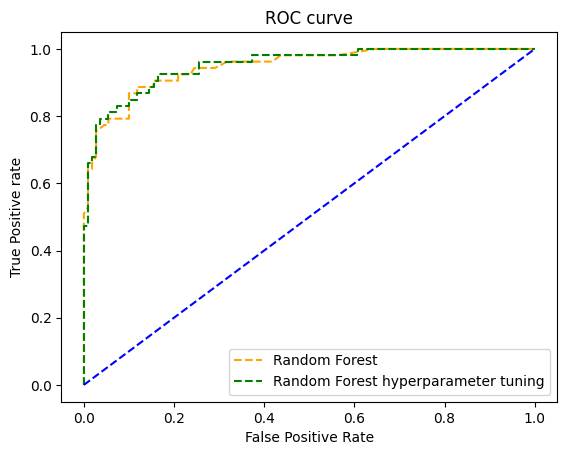

In [24]:
# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Random Forest')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Random Forest hyperparameter tuning')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC_SMOTE',dpi=300)
plt.show()

In [25]:
from yellowbrick.classifier import confusion_matrix

def vis_conf(model, X_test, y_test):
    plt.figure(figsize=(6, 5))
    visualizer = confusion_matrix(
        model,
        X_test, y_test,
        is_fitted=True,
        classes=['Negative', 'Positive']
    )
    visualizer.show();

In [26]:
def test_results(model, X_test, y_test):
    from sklearn.metrics import confusion_matrix
    y_pred = model.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    accuracy = (tp + tn)/(tp + fp + tn + fn)
    print("Accuracy: ", '{:.2f}'.format(accuracy * 100))
    print("True Negative:", tn)
    print("True Positve:", tp)
    print("False Positive:", fp)
    print("False Negative:", fn)
    print()
    print("-------------------------------------------------------")
    print("Negative Class Results")
    precision = (tp / (tp + fp)) 
    recall =  (tp  / (tp + fn)) 
    f1_score = (2 * (precision * recall) / (precision + recall)) 
    print("Precision (N): ", '{:.2f}'.format(precision * 100))
    print("Recall (N): ", '{:.2f}'.format(recall * 100))
    print("F1 Score (N):" ,  '{:.2f}'.format(f1_score * 100))
    print()
    print("-------------------------------------------------------")
    print("Positive Class Results")
    precision = (tn / (tn + fn))
    recall =  (tn  / (tn + fp))
    f1_score = (2 * (precision * recall) / (precision + recall))
    print("Precision (P): ", '{:.2f}'.format(precision * 100))
    print("Recall (P): ", '{:.2f}'.format(recall * 100))
    print("F1 Score (P):" , '{:.2f}'.format(f1_score * 100))

In [27]:
test_results(rf_model1, X_test, y_test)

Accuracy:  87.73
True Negative: 101
True Positve: 42
False Positive: 9
False Negative: 11

-------------------------------------------------------
Negative Class Results
Precision (N):  82.35
Recall (N):  79.25
F1 Score (N): 80.77

-------------------------------------------------------
Positive Class Results
Precision (P):  90.18
Recall (P):  91.82
F1 Score (P): 90.99


In [28]:
test_results(random_search, X_test, y_test)

Accuracy:  89.57
True Negative: 103
True Positve: 43
False Positive: 7
False Negative: 10

-------------------------------------------------------
Negative Class Results
Precision (N):  86.00
Recall (N):  81.13
F1 Score (N): 83.50

-------------------------------------------------------
Positive Class Results
Precision (P):  91.15
Recall (P):  93.64
F1 Score (P): 92.38


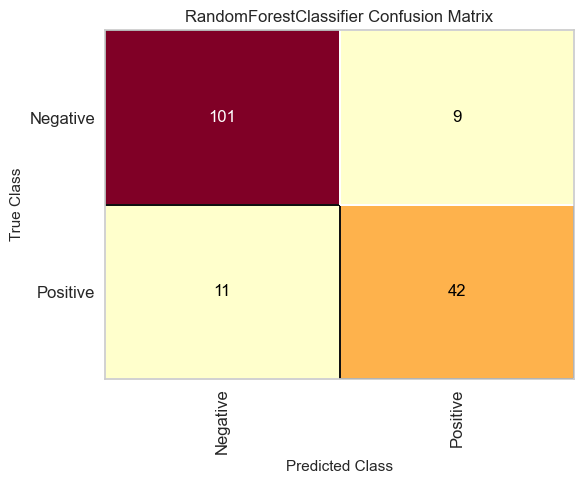

In [29]:
vis_conf(rf_model1, X_test, y_test)

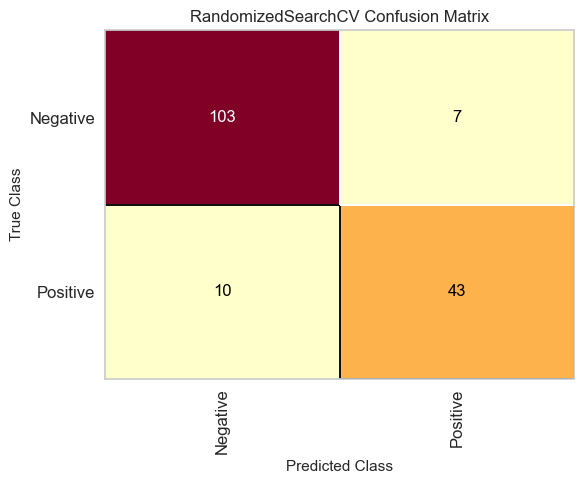

In [30]:
vis_conf(random_search, X_test, y_test)

In [32]:
import pickle as pkl
pkl.dump(random_search, open("RFC3.pkl", "wb"))